I assume that you have downloaded Groove MIDI dataset and uncompssed into `./midi_dataset/groove/` folder  
https://magenta.tensorflow.org/datasets/groove 

or you can use the following MIDI archive a reddit user has collected (it contains more than 800k drum midi pattern!). If you want to try this archive, uncompress into `./midi_dataset/gm_reddit/` folder.
https://www.reddit.com/r/WeAreTheMusicMakers/comments/3anwu8/the_drum_percussion_midi_archive_800k/ 

or you can download preprocessed pianoroll data of lots of drum patterns and place them in `./data/`. 
https://drive.google.com/drive/folders/1IjcSNACkleZKe7AF-FO_RefKvOWwN8NH?usp=sharing

In [ ]:
from glob import glob
import os

os.environ["CUDA_VISIBLE_DEVICES"] = '0'

#filepaths = glob("./midi_dataset/groove/*/*/*beat_4-4.mid")
filepaths = glob("./midi_dataset/gm_reddit/GM MIDI Pack/GM - Electronic/*/*/*.mid")
#filepaths.extend(filepaths2)

print(len(filepaths))

# remove "fill" rhythms
filepaths = [path for path in filepaths if "fill" not in path]
print(len(filepaths))

In [3]:
GM_DRUMS = {
    35: "Acoustic Bass Drum",
    36: "Bass Drum 1",
    37: "Side Stick",
    38: "Acoustic Snare",
    39: "Hand Clap",
    40: "Electric Snare",
    41: "Low Floor Tom",
    42: "Closed Hi Hat",
    43: "High Floor Tom",
    44: "Pedal Hi-Hat",
    45: "Low Tom",
    46: "Open Hi-Hat",
    47: "Low-Mid Tom",
    48: "Hi-Mid Tom",
    49: "Crash Cymbal 1",
    50: "High Tom",
    51: "Ride Cymbal 1",
    52: "Chinese Cymbal",
    53: "Ride Bell",
    54: "Tambourine",
    55: "Splash Cymbal",
    56: "Cowbell",
    57: "Crash Cymbal 2",
    58: "Vibraslap",
    59: "Ride Cymbal 2",
    60: "Hi Bongo",
    61: "Low Bongo",
    62: "Mute Hi Conga",
    63: "Open Hi Conga",
    64: "Low Conga",
    65: "High Timbale",
    66: "Low Timbale",
    67: "High Agogo",
    68: "Low Agogo",
    69: "Cabasa",
    70: "Maracas",
    71: "Short Whistle",
    72: "Long Whistle",
    73: "Short Guiro",
    74: "Long Guiro",
    75: "Claves",
    76: "Hi Wood Block",
    77: "Low Wood Block",
    78: "Mute Cuica",
    79: "Open Cuica",
    80: "Mute Triangle",
    81: "Open Triangle"
}

In [4]:
DRUM_CLASSES = [
   'Kick',
   'Snare',
   'Hi-hat closed',
   'Hi-hat open',
   'Tom',
   'Tambourine/Timbale', 
   'Cymbal',
   'Percussion',
   'Clap',
]

# MIDI_DRUM_MAP = {
#     36: 0,
#     38: 1,
#     40: 1,
#     37: 1,
#     48: 5,
#     50: 6,
#     45: 4,
#     47: 5,
#     43: 4,
#     58: 4,
#     46: 3,
#     26: 3,
#     42: 2,
#     22: 2,
#     44: 2,
#     49: 7,
#     55: 7,
#     57: 7,
#     52: 7,
#     51: 8,
#     59: 8,
#     53: 8 
# }

## if you want to use reddit dataset, uncomment this
MIDI_DRUM_MAP = {
    36: 0,
    35: 0,
    38: 1,
    40: 1,
    42: 2, # closed hihat
    44: 3, # pedal hihat
    46: 3, # open hihat
    41: 4, # low floor tom
    43: 4, # high floor tom
    45: 4, # low tom
    47: 4, # low-mid tom
    48: 4, # high-mid tom
    50: 4, # high tom
    54: 5, # tambourine 
    66: 5, # low timbale
    49: 6, # crash symbal 1
    51: 6, # ride  cymbal 1
    57: 6, # crash symbal 2
    59: 6, # ride cymbal 2
    67: 7, # high agogo
    58: 7, # low agogo
    69: 7, # cabasa
    70: 7, # maracas
    60: 7, # hi bongo
    61: 7, # low bongo
    62: 7, # mute hi congo
    63: 7, # open hi congo
    64: 7, # low conga
    37: 7, # side stick
    39: 8, # hand clap
}


DRUM_MIDI_MAP = [ # pianoroll to MIDI - reverse
    36, # 0 Kick / Bass Drum 1
    40, # 1 Snare / Electric Snare
    42, # 2 Hihat Closed
    46, # 3 Hihat Open
    47, # 4 Tom  / Low-mid Tom
    66, # 5 Low Timbale
    51, # 6 Cymbal
    63, # 7 Percussion / Open Hi Conga
    39  # 8 Clap
]
    
       
resolution  = 4 # separate quater into 4  = 16 notes per bar

nb_bars = 2 

len_seq = resolution * 4 * nb_bars # length of drumloops in training data - 2 bars
    
nb_notes = len(DRUM_CLASSES) # number of possible MIDI notes  - max_drum_note - min_drum_note


In [9]:
# genres 
def get_genre_from_path(path):
    genre = path.split("/")[-2]
    genre = genre.split("@")[-1]
    genre = genre.lower()
    genre = genre.replace(" ", "_")
    return genre

all_genres = {}
for path in filepaths:
    genre = get_genre_from_path(path)
    if genre not in all_genres:
        all_genres[genre] = 1
    else:
        all_genres[genre] += 1        
print (all_genres)

# genre used. ignore smallers genres
GENRES = []
for genre, nb in all_genres.items():
    if nb > 500:
        GENRES.append(genre)
print(GENRES)
NB_GENRES = len(GENRES)

{'techno': 766, 'house': 576, 'jungle': 768, 'downtempo': 576, 'trance': 858, 'bonus': 485, 'garage': 1071, 'dnb': 1122, 'basic': 480, 'old_skool': 576, 'breakbeat': 1352, 'four_to_the_floor': 232, 'preview_files': 60}
['techno', 'house', 'jungle', 'downtempo', 'trance', 'garage', 'dnb', 'old_skool', 'breakbeat']


In [5]:
import random
import numpy as np
import os
import joblib
import pretty_midi
import glob

def count_midi_note(path, all_notes, drum_notes):
    
    # load midi file
    try:
        pm = pretty_midi.PrettyMIDI(path)
    except:
        print ("Failed to load midi: ", path)
        return None

    for instrument in pm.instruments:
        if instrument.is_drum == True or 1:  # use drum tracks only            
            for note in instrument.notes:
                if note.pitch in MIDI_DRUM_MAP:
                    drum_note = MIDI_DRUM_MAP[note.pitch]
                    if drum_note not in drum_notes:
                        drum_notes[drum_note] = 1
                    else:
                        drum_notes[drum_note] += 1
                
                if note.pitch not in all_notes:
                    all_notes[note.pitch] = 1
                else:
                    all_notes[note.pitch] += 1
        else:
            print("not drum track!")
    return all_notes, drum_notes

In [8]:

for target_genre in all_genres:
    print (target_genre)
    all_notes = {}
    drum_notes = {}
    
    for path in filepaths:
        genre = get_genre_from_path(path)
        if genre not in all_genres:
            print (genre)
        if target_genre == genre:
            all_notes, drum_notes = count_midi_note(path, all_notes, drum_notes)
        
    all_notes = {k: v for k, v in sorted(all_notes.items(), key=lambda item: item[1], reverse=True)}
    drum_notes = {k: v for k, v in sorted(drum_notes.items(), key=lambda item: item[1], reverse=True)}

    for i, m in enumerate(all_notes.keys()):
        if m in GM_DRUMS:
            print(m, GM_DRUMS[m], all_notes[m])
        else:
            print("midi %d is not in GM" % m)
        if i > 10:
            break
    print()
            
    for i, m in enumerate(drum_notes.keys()):
        print(DRUM_CLASSES[m], drum_notes[m])

    print()
    print()

techno
36 Bass Drum 1 12258
42 Closed Hi Hat 11896
38 Acoustic Snare 3524
40 Electric Snare 3155
48 Hi-Mid Tom 2845
46 Open Hi-Hat 2662
44 Pedal Hi-Hat 1965
66 Low Timbale 1837
54 Tambourine 1829
50 High Tom 1423
39 Hand Clap 930
47 Low-Mid Tom 767

Kick 12346
Hi-hat closed 11896
Snare 6679
Tom 5757
Hi-hat open 4627
Tambourine/Timbale 3666
Percussion 1721
Cymbal 984
Clap 930


house
42 Closed Hi Hat 10618
36 Bass Drum 1 7273
38 Acoustic Snare 4233
46 Open Hi-Hat 3324
44 Pedal Hi-Hat 2111
54 Tambourine 1700
40 Electric Snare 1646
66 Low Timbale 1572
48 Hi-Mid Tom 831
37 Side Stick 678
50 High Tom 622
39 Hand Clap 604

Hi-hat closed 10618
Kick 7379
Snare 5879
Hi-hat open 5435
Tambourine/Timbale 3272
Percussion 1768
Tom 1617
Cymbal 717
Clap 604


jungle
42 Closed Hi Hat 13930
36 Bass Drum 1 8825
38 Acoustic Snare 7584
44 Pedal Hi-Hat 4603
40 Electric Snare 2854
54 Tambourine 2093
66 Low Timbale 2069
46 Open Hi-Hat 1114
48 Hi-Mid Tom 1108
50 High Tom 1061
57 Crash Cymbal 2 465
37 Side Stic

## MIDI -> piano roll matrix

In [10]:
import random
import numpy as np
import os
import joblib
import pretty_midi
import glob


import matplotlib.pyplot as plt
%matplotlib inline


def plot_drum_matrix(a):
    if a is not None:
        a = np.transpose(np.squeeze(a))
        plt.matshow(a)
        plt.show()  


36 ./midi_dataset/gm_reddit/GM MIDI Pack/GM - Electronic/GM - Electronic FPC/Trance/140 Trance 13d.mid
(1, 32, 9)
(1,)


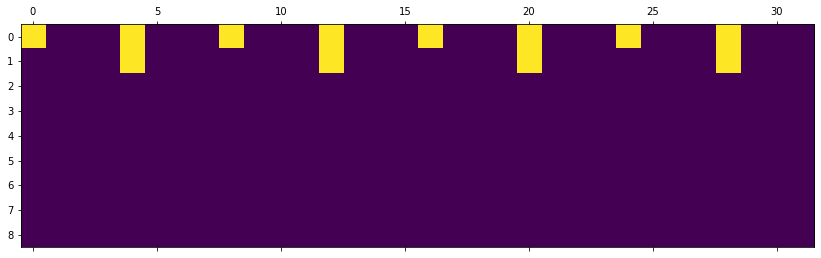

[[ 0.          0.          0.          0.          0.          0.
   0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.          0.        ]
 [ 0.         -0.03333333  0.          0.          0.          0.
   0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.  

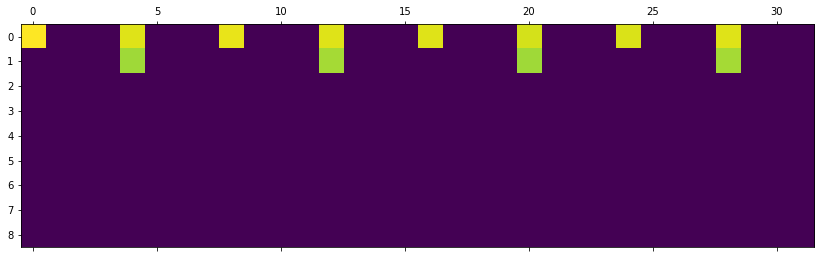

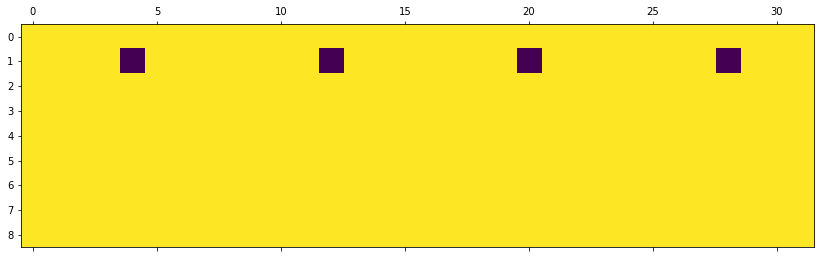

In [36]:

# ignore drum loops with onsets less than MIN_NB_ONSETS
MIN_NB_ONSETS = 5


# unit timestep = 16th note
def get_pianomatrices_of_drums(midi_file, is_drum=True):
    found = False
    genre_id = -1
    
    # is it in selected genres?
    genre = get_genre_from_path(midi_file)
    if genre not in GENRES:
        return None
    genre_id = GENRES.index(genre)
        
    # load midi file
    try:
        pm = pretty_midi.PrettyMIDI(midi_file)
    except:
        print ("Failed to load midi: ", midi_file)
        return None
        
    # get timiming of quater notes
    beats = pm.get_beats()
    
    # make it to 16th notes
    beats_ticks = [] # converting to ticks
    
    for i in range((len(beats) +1)* 4):
        beats_ticks.append(i * pm.resolution / 4)
    
    num_notes16 = len(beats_ticks)
    print(num_notes16, midi_file)
    
    # maximum duration of one note
    max_duration = 2.0 # 2 quater notes

    # convert ticks to index of 16th note
    def find_note_index(tick, beats_ticks):
        return (np.abs(beats_ticks - tick)).argmin()
    
    def get_offset(beats_ticks, grid_id, note_start):
        grid_start = beats_ticks[grid_id]
        tick_diff = note_start - grid_start
        tick_grid = pm.resolution / resolution * 0.5 # half of 16th note = 32nd note
        diff_coef= tick_diff / tick_grid   # coef to a half of 16th note
        return diff_coef
        
    # # of notes
    notes_length = 4 * nb_bars * resolution

    # create pianoroll matrix (resolution: 16th note))
    onsets, velocities, timeshifts, durations, genre_ids = [], [], [], [], []
    
    for instrument in pm.instruments:
#         if instrument.is_drum == is_drum or 1:
        for note_start in range(0, num_notes16 - 16, 16): # hopsize = 1bar = 16 16th notes
            onset = np.zeros((notes_length, nb_notes), dtype='float') 
            velocity = np.zeros((notes_length, nb_notes), dtype='float') 
            timeshift = np.zeros((notes_length, nb_notes), dtype='float')
            duration = np.zeros((notes_length, nb_notes), dtype='float')

            for note in instrument.notes:
                idx_start = find_note_index(pm.time_to_tick(note.start), beats_ticks)
                diff_coef = get_offset(beats_ticks, idx_start, pm.time_to_tick(note.start))

                if note_start <= idx_start and idx_start < note_start + notes_length:
                    if note.pitch in MIDI_DRUM_MAP:
                        drum_note = MIDI_DRUM_MAP[note.pitch]

                        onset[idx_start - note_start, drum_note] = 1
                        velocity[idx_start - note_start, drum_note]  = note.velocity / 127.
                        timeshift[idx_start - note_start, drum_note] = diff_coef

                        dur = (pm.time_to_tick(note.end) - pm.time_to_tick(note.start))/ (pm.resolution / 4)
                        dur = min(1.0, max(0, dur / max_duration))
                        duration[idx_start - note_start, drum_note] = dur
                    else:
                        print("not found", note.pitch )

            if np.sum(onset > 0.) >= MIN_NB_ONSETS:
                # ignore the last part of the midi file where rhythm ends in the first bar
                if np.sum(onset[notes_length//2:,:]) > 0: 
                    onsets.append(onset)
                    velocities.append(velocity)
                    timeshifts.append(timeshift)
                    durations.append(duration)
                    genre_ids.append(genre_id)


    onsets = np.array(onsets)
    velocities = np.array(velocities)
    timeshifts = np.array(timeshifts)
    durations = np.array(durations)
    genre_ids = np.array(genre_ids)
    
    return (onsets,velocities, timeshifts, durations, genre_ids)
    
midi_file = random.choice(filepaths)
onsets, velocities, timeshifts, duration, genre_ids = get_pianomatrices_of_drums(midi_file)    

# sample
print (timeshifts.shape)
print (genre_ids.shape)

for i in range(min(3, len(onsets))):
    plot_drum_matrix(onsets[i])
    print(timeshifts[i])
    plot_drum_matrix(velocities[i])
    plot_drum_matrix(timeshifts[i])

# Batch processing

it may take more than an hour. plase be patient!

In [37]:
# Start creating piano-roll matrix
matrices_drums_list = joblib.Parallel(n_jobs=-1, verbose=1)(
   joblib.delayed(get_pianomatrices_of_drums)(midi_file, True)     
     for midi_file in filepaths)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 6640 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done 8922 out of 8922 | elapsed:    9.2s finished


In [38]:
# clean up! 
matrices_drums_selected = [a for a in matrices_drums_list if a is not None]
matrices_drums_selected = [a for a in matrices_drums_selected
                           if (a[0].shape[0] == a[1].shape[0] and a[1].shape[0] == a[2].shape[0] and a[2].shape[0] == a[3].shape[0] and a[0].shape[0]>0)]

matrices_drums_ = [a[0] for a in matrices_drums_selected] # if a is not None and len(a[0].shape)==3 and a[3].shape[0] == a[0].shape[0]]
matrices_velos_ = [a[1] for a in matrices_drums_selected]
matrices_times_ = [a[2] for a in matrices_drums_selected] # if a is not None and len(a[1].shape)==3 and a[3].shape[0] == a[0].shape[0]]
matrices_durations_ = [a[3] for a in matrices_drums_selected] #if a is not None and len(a[2].shape)==3 and a[3].shape[0] == a[0].shape[0]]
matrices_genre_ids_ = [np.squeeze(a[4]) for a in matrices_drums_selected] #if a is not None and a[3].ndim==1 and a[3].shape[0] == a[0].shape[0]]

matrices_drums = np.vstack(matrices_drums_)
print (matrices_drums.shape)

matrices_velos = np.vstack(matrices_velos_)
print (matrices_velos.shape)

matrices_times = np.vstack(matrices_times_)
print (matrices_times.shape)

matrices_durations = np.vstack(matrices_durations_)
print (matrices_durations.shape)

matrices_genre_ids = np.hstack(matrices_genre_ids_)
print (matrices_genre_ids.shape)



(16647, 32, 9)
(16647, 32, 9)
(16647, 32, 9)
(16647, 32, 9)
(16647,)


## Save preprocessed data

In [ ]:
# store data
np.savez("./tmp/matrices_drum_gm_clean.npz", onsets=matrices_drums, velocities=matrices_velos, offsets=matrices_times,
         durations=matrices_durations, genre_ids=matrices_genre_ids, genres=GENRES)

## Restore preprocessed data

In [8]:
import numpy as np

matrices_onsets = np.load("./data/matrices_drum_gm_clean.npz")['onsets']
matrices_velos = np.load("./data/matrices_drum_gm_clean.npz")['velocities']
matrices_offsets = np.load("./data/matrices_drum_gm_clean.npz")['offsets']
matrices_genres = np.load("./data/matrices_drum_gm_clean.npz")['genre_ids']

GENRES = np.load("./data/matrices_drum_gm_clean.npz")['genres']
NB_GENRES = len(GENRES)

print(GENRES)

['techno' 'house' 'jungle' 'downtempo' 'trance' 'garage' 'dnb' 'old_skool'
 'breakbeat']


## Matrix data -> MIDI Playback

If you haven't installed `fluidsynth`, try `sudo apt-get install fluidsynth`.

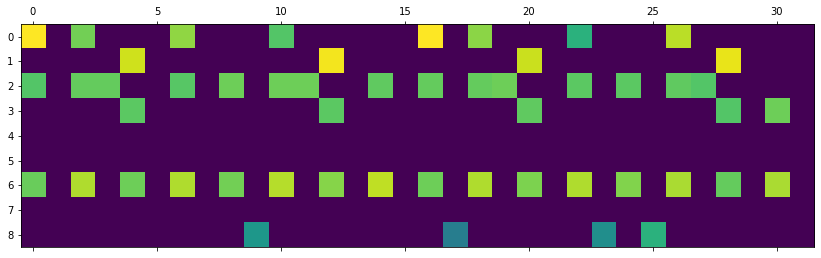

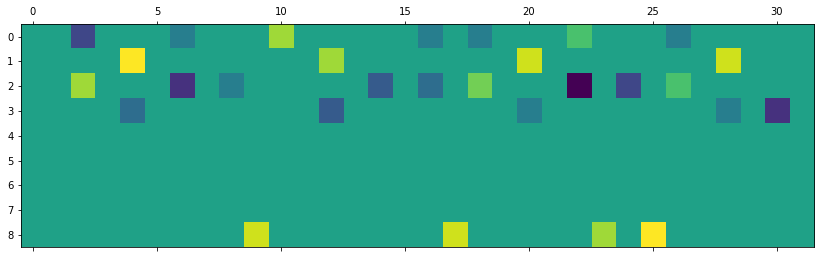

playback without timing offset


playback with timing offset


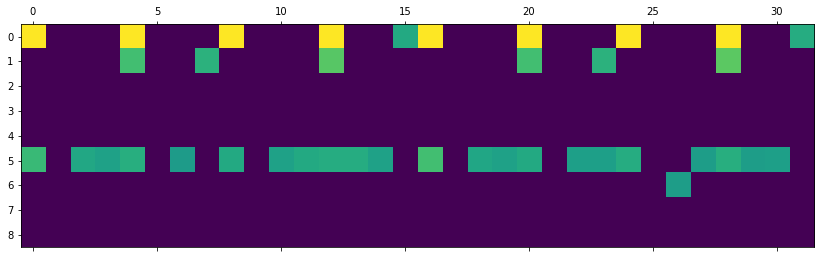

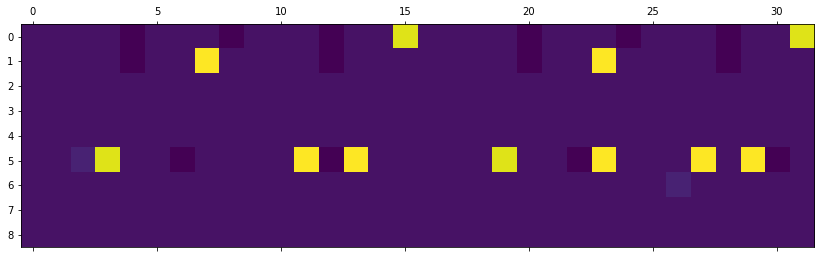

playback without timing offset


playback with timing offset


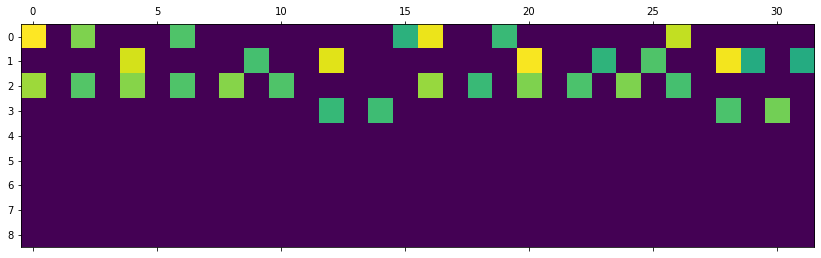

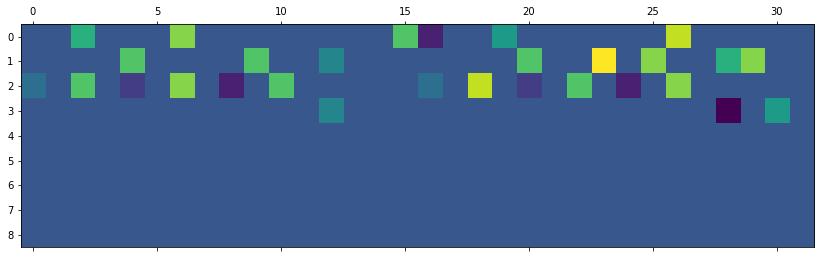

playback without timing offset


playback with timing offset


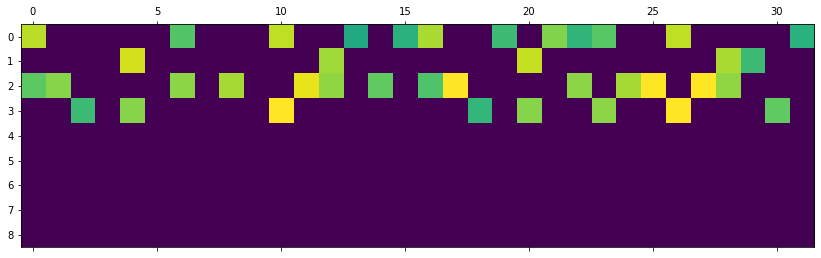

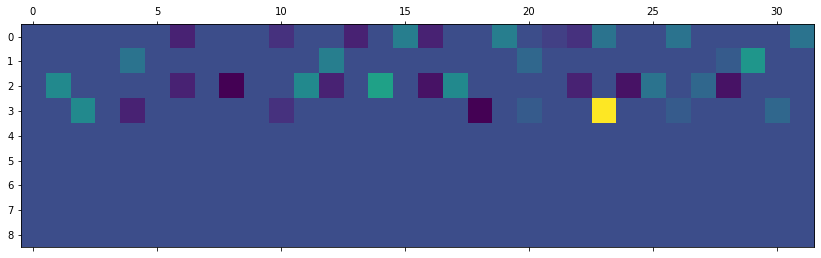

playback without timing offset


playback with timing offset


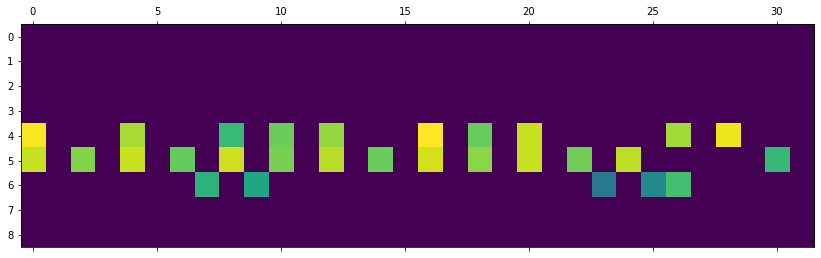

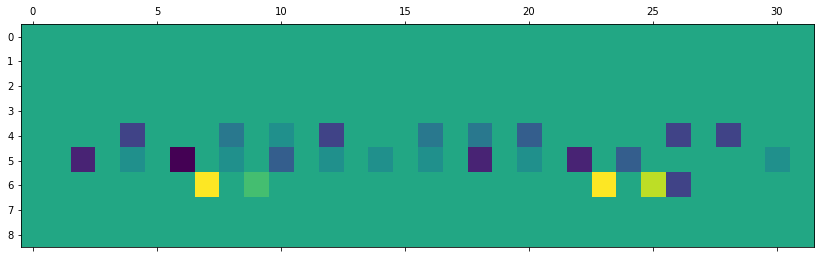

playback without timing offset


playback with timing offset


In [12]:
import pretty_midi
import random
from IPython.display import Audio

def play_drum_matrix(mat, offsets=None, tempo=120.0):
    # generate audio
    audio_data = get_audio_from_drum_matrix(mat, offsets=offsets, tempo=tempo)
    display(Audio(audio_data, rate=44100))
    return audio_data

def get_audio_from_drum_matrix(velocities, offsets=None, tempo=120.):
    pm = pretty_midi.PrettyMIDI(initial_tempo=tempo) # midi object
    pm_inst = pretty_midi.Instrument(0, is_drum=True) # midi instrument
    
    timestep = (60./tempo) / 4. # duration of a 16th note
    offset_unit = timestep / 2. # max offset == 32nd note
    
    for position, timeslot in enumerate(velocities):
        for inst, onset in enumerate(timeslot):
            if onset > 0.:
                note_number = DRUM_MIDI_MAP[inst]
                velocity = int(onset * 127.)
                
                offset = 0
                if offsets is not None:
                    offset = offsets[position, inst] * offset_unit

                start = timestep * position + offset
                end = timestep * (position + 0.5) + offset # duration doesn't matter much for rhythm track
                
                # create a midi note
                note = pretty_midi.Note(velocity=velocity, pitch=note_number, start=start, end=end)
                pm_inst.notes.append(note)
    pm.instruments.append(pm_inst)

    # midi -> audio
    audio_data = pm.fluidsynth()
    return audio_data


# Visualize / Sonification
for _ in range(5):
    index = random.randint(0, len(matrices_velos))
    mat = matrices_velos[index]
    offset = matrices_offsets[index]

    plot_drum_matrix(mat)
    plot_drum_matrix(offset)
    
    print("playback without timing offset")
    audio_data = play_drum_matrix(mat, offsets=None, tempo=100.)
    print("playback with timing offset")
    audio_data = play_drum_matrix(mat, offsets=offset, tempo=100.)

#     from scipy.io import wavfile
#     wavfile.write("drum.wav", 44100, audio_data)

In [13]:
## Get some statistics on the drum patterns

--------------------------------
techno
    average onsets


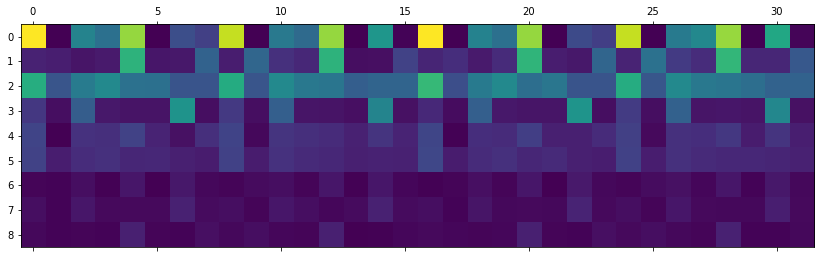

    std


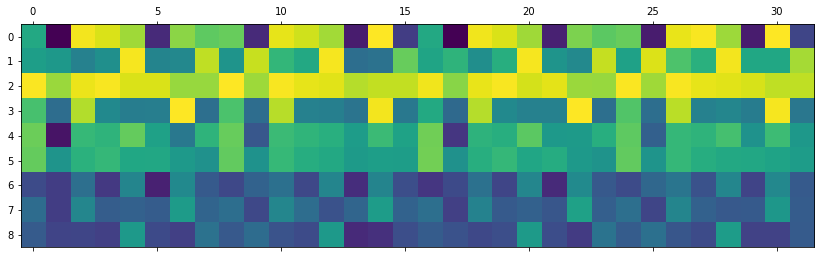

    average timing offsets


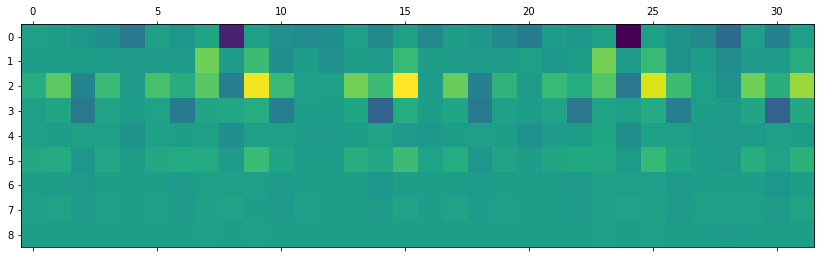

    std timing offsets


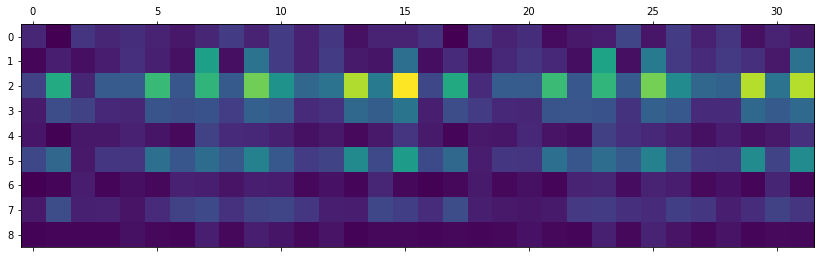


--------------------------------
house
    average onsets


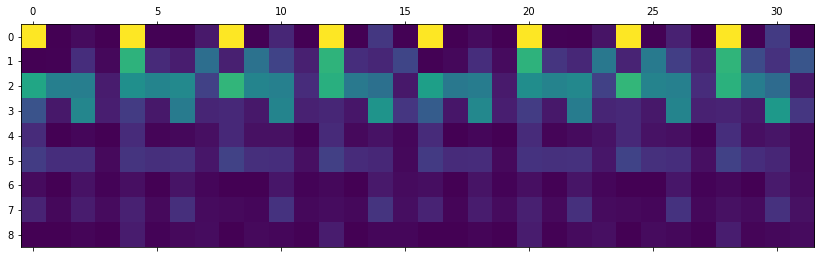

    std


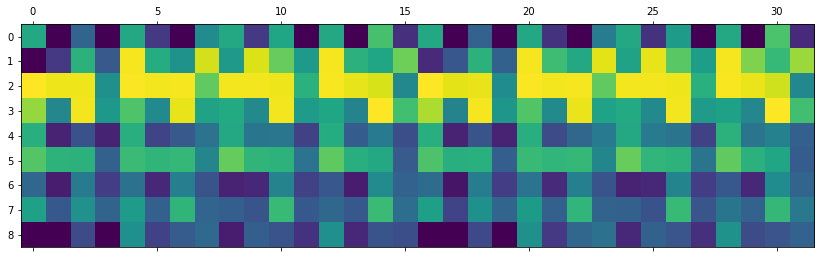

    average timing offsets


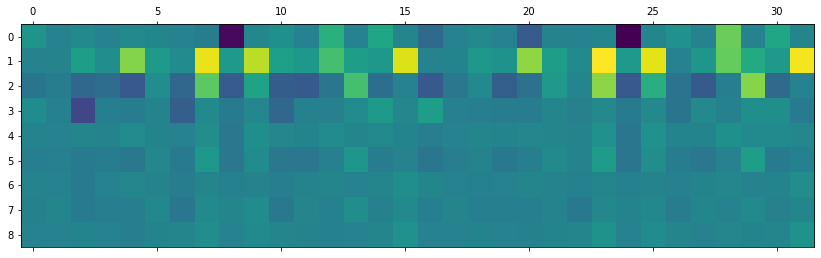

    std timing offsets


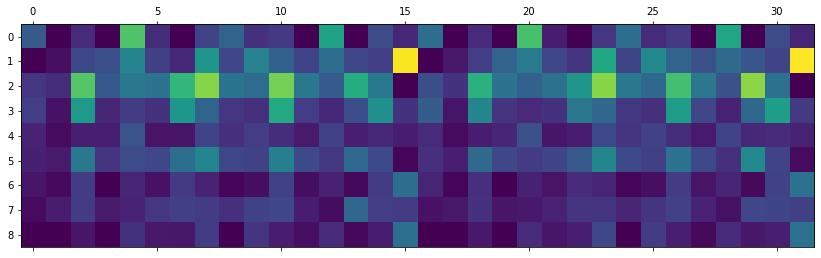


--------------------------------
jungle
    average onsets


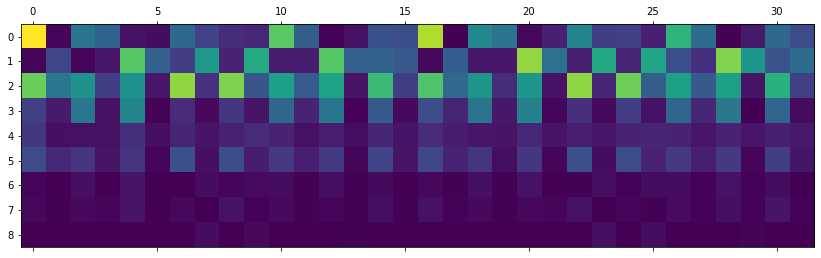

    std


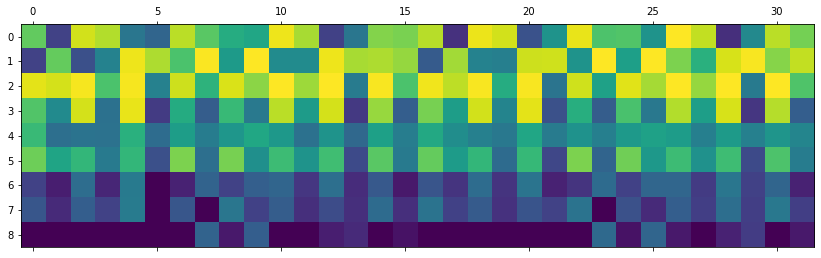

    average timing offsets


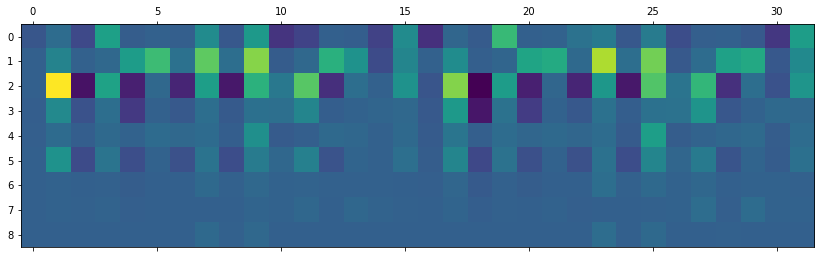

    std timing offsets


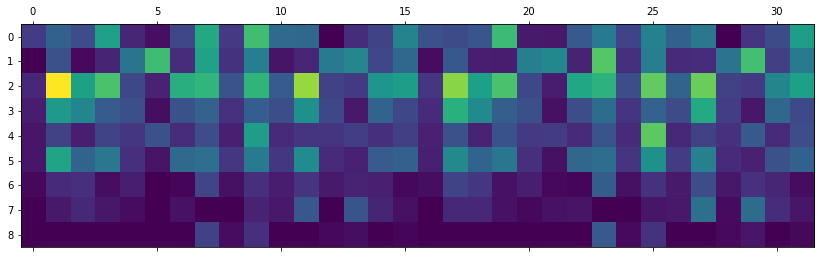


--------------------------------
downtempo
    average onsets


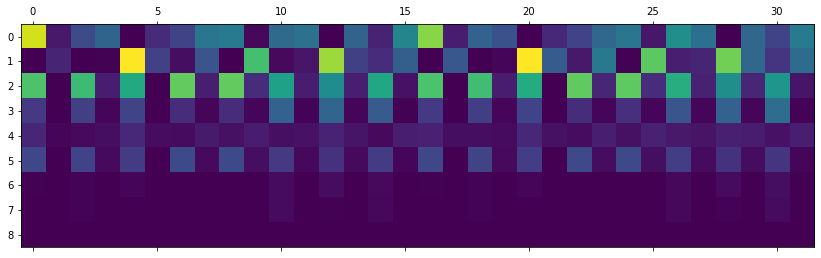

    std


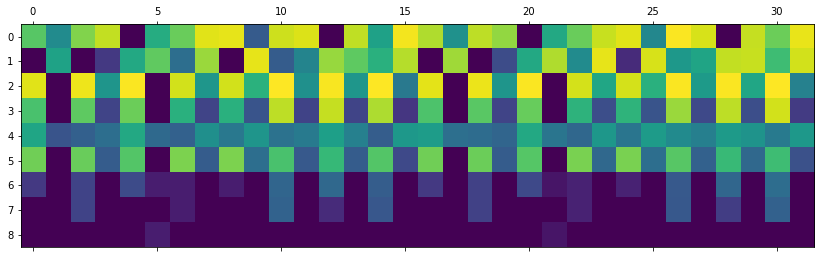

    average timing offsets


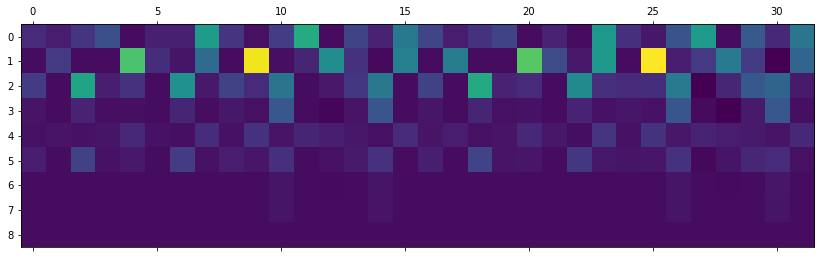

    std timing offsets


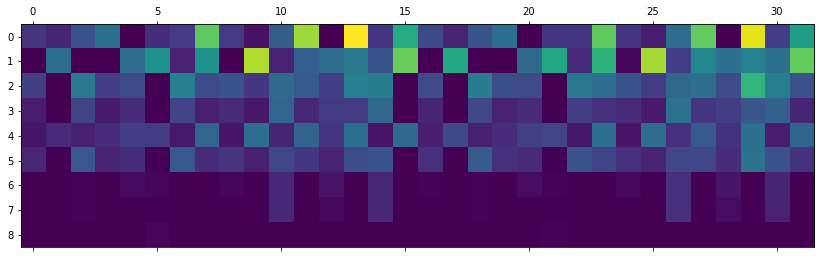


--------------------------------
trance
    average onsets


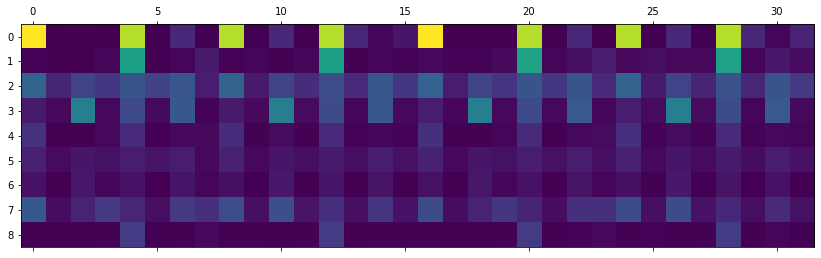

    std


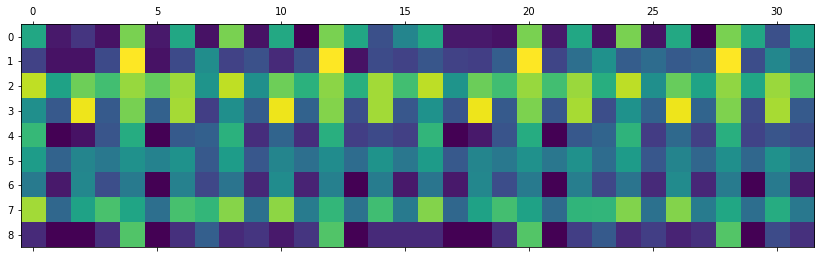

    average timing offsets


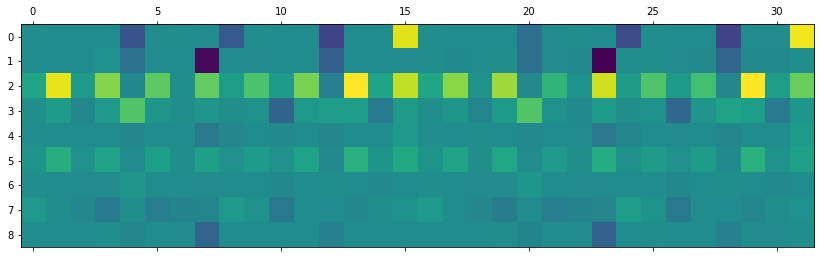

    std timing offsets


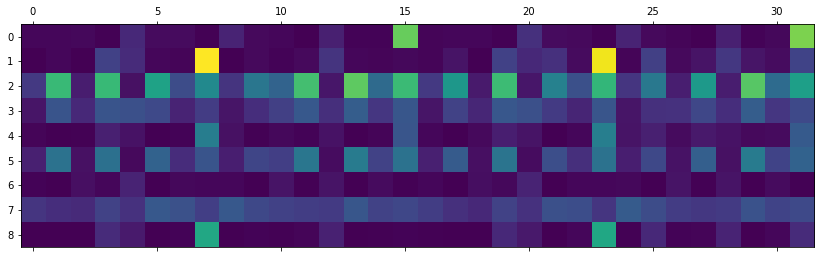


--------------------------------
garage
    average onsets


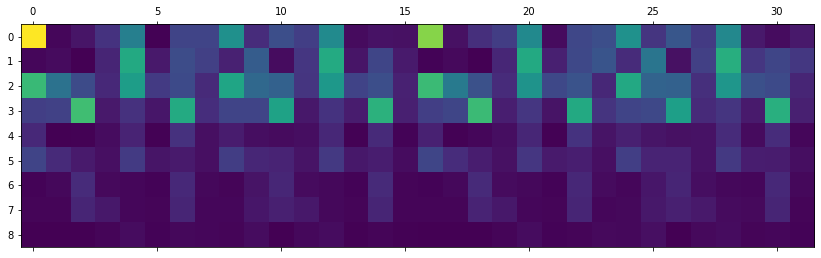

    std


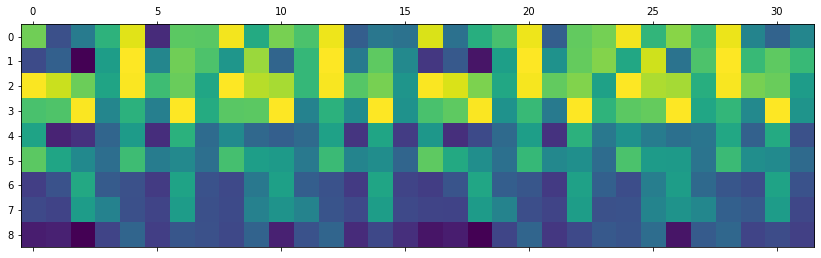

    average timing offsets


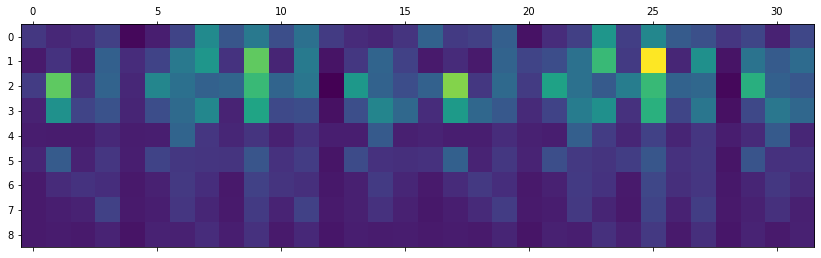

    std timing offsets


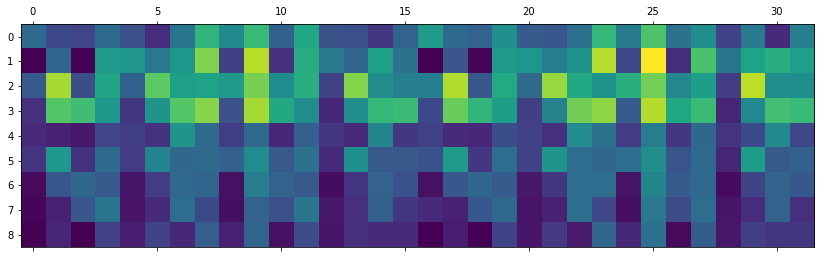


--------------------------------
dnb
    average onsets


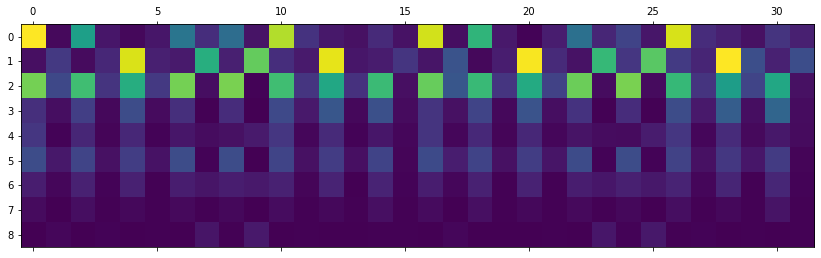

    std


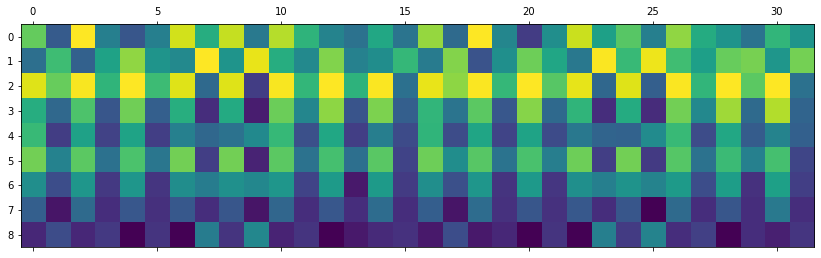

    average timing offsets


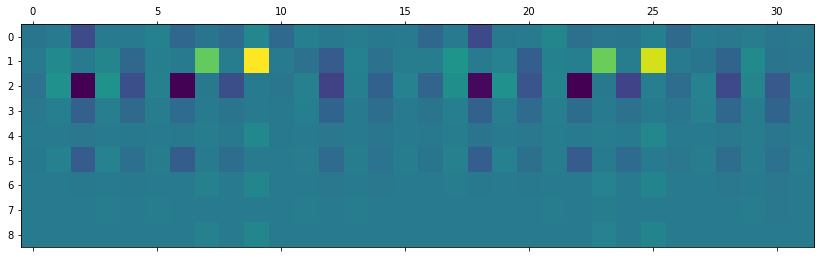

    std timing offsets


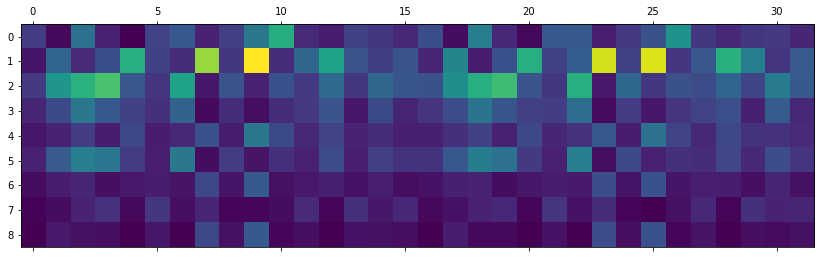


--------------------------------
old_skool
    average onsets


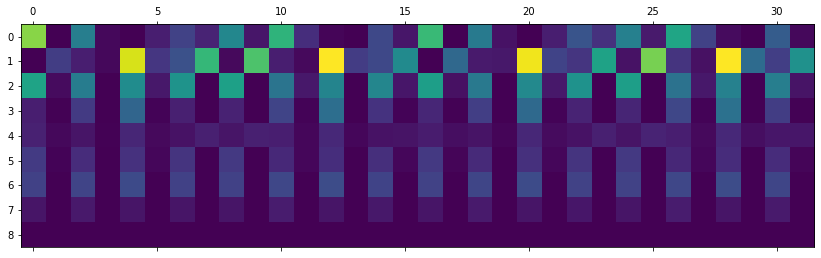

    std


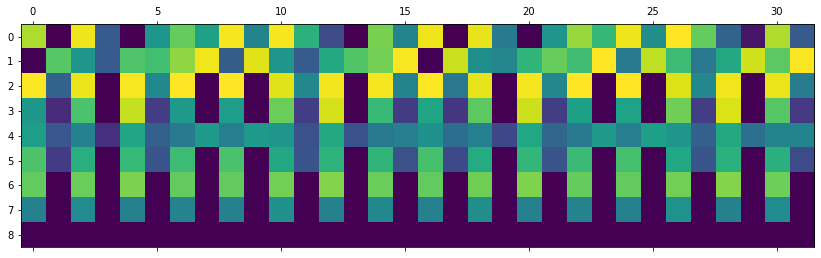

    average timing offsets


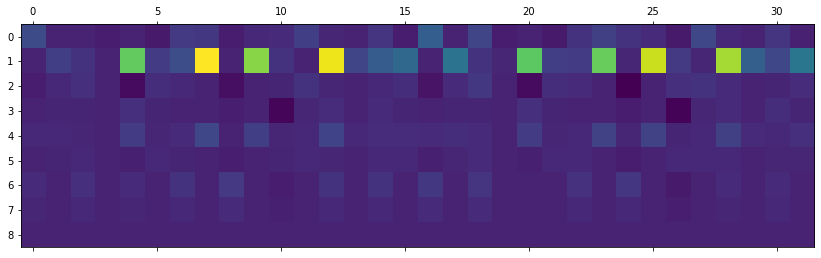

    std timing offsets


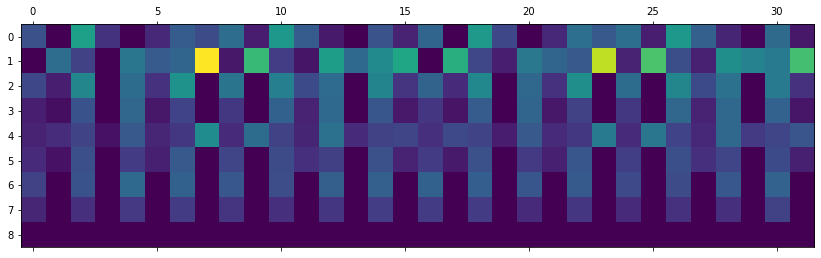


--------------------------------
breakbeat
    average onsets


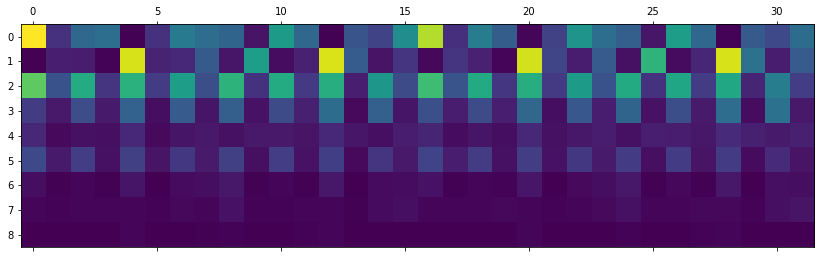

    std


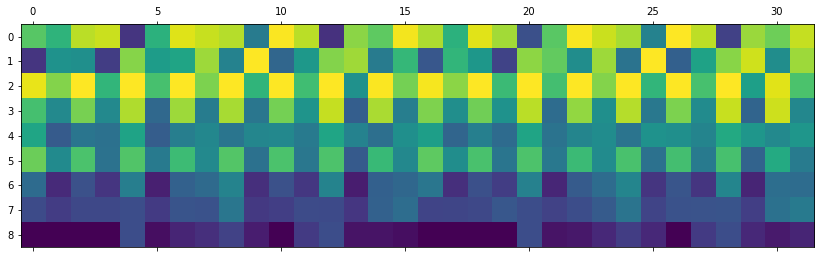

    average timing offsets


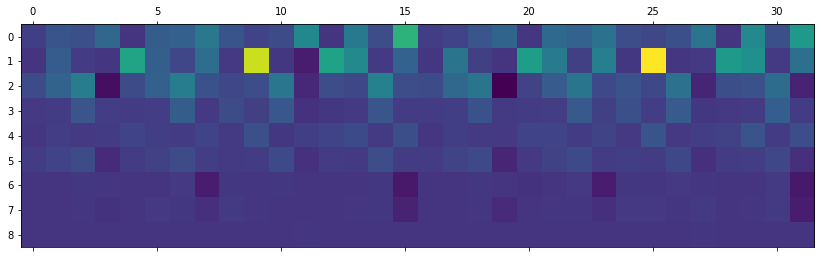

    std timing offsets


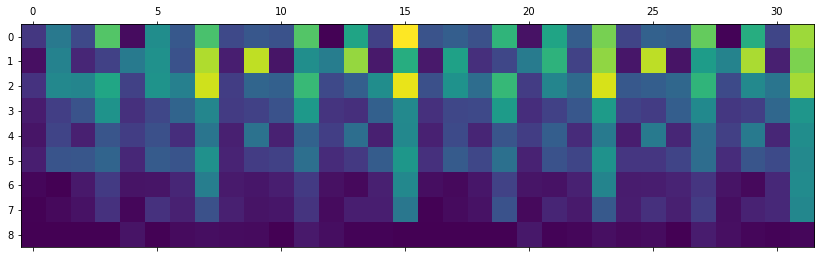

In [17]:
for i, genre in enumerate(GENRES):
    print('--------------------------------')
    print(genre)
    d = np.array([d  for d, g in zip(matrices_onsets, matrices_genres) if g == i])
    o = np.array([d  for d, g in zip(matrices_offsets, matrices_genres) if g == i])
    
    
    print("    average onsets")
    plot_drum_matrix(np.mean(d, axis=0))
    
    print("    std")
    plot_drum_matrix(np.std(d, axis=0))
    #print(np.std(d, axis=0))
    
    print("    average timing offsets")
    plot_drum_matrix(np.mean(o, axis=0))
    print("    std timing offsets")
    plot_drum_matrix(np.std(o, axis=0))
    
    print()
#     index = random.randint(0, d.shape[0])
#     print(o[index].shape)
#     play_drum_matrix(d[index], offsets=o[index])
    
#     index = random.randint(0, d.shape[0])
#     print(o[index].shape)
#     play_drum_matrix(d[index], offsets=o[index])